<a id="#top"></a><h1>Star Wars Survey Project</h1>

<h2>Objective : Does the rest of America realize that “The Empire Strikes Back” is clearly the best of the bunch?</h2>

<h3>Data set location : <a href="https://github.com/fivethirtyeight/data/blob/master/star-wars-survey/StarWars.csv?raw=true">https://github.com/fivethirtyeight/data/blob/master/star-wars-survey/StarWars.csv?raw=true</a></h3>

<p><strong>About the project :</strong> While waiting for Star Wars: The Force Awakens to come out, the team at FiveThirtyEight became interested in answering some questions about Star Wars fans. In particular, they wondered: <i>does the rest of America realize that “The Empire Strikes Back” is clearly the best of the bunch?</i>

<p><strong>Link to original story :</strong> <a href="https://fivethirtyeight.com/features/americas-favorite-star-wars-movies-and-least-favorite-characters/">https://fivethirtyeight.com/features/americas-favorite-star-wars-movies-and-least-favorite-characters/</a></p>

Data prep and cleaning:
- [EDA Notes](#EDA)
- [EDA Notes 2](#EDA2)
***
The questions we will try to answer are the following : 
   1. [Which film is considered the best?](#question1)
   2. [Which movie has been seen the most?](#question2)
   3. [Is there any difference between movie rankings and gender?](#question3)
   4. [Which characters are most or least popular?](#question4)
   5. [Do our answers change among hardcore fans?](#question5)
   6. [Which film is most popular among hardcore fans, split by gender?](#question6)
   7. [Which characters are most/least popular among hardcore fans?](#question7)
   8. [In what order are the films most popular across different age groups? Are older fans nostalgic for the original trilogy?](#question8)
   9. [Does income bracket change your rankings?](#question9)

In [1]:
# Importing useful libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline
import seaborn as sns

In [2]:
# importing data which is available online and reading columns list
url = "https://github.com/fivethirtyeight/data/blob/master/star-wars-survey/StarWars.csv?raw=true"
data = pd.read_csv(url, encoding="ISO-8859-1")
data.columns.tolist()

['RespondentID',
 'Have you seen any of the 6 films in the Star Wars franchise?',
 'Do you consider yourself to be a fan of the Star Wars film franchise?',
 'Which of the following Star Wars films have you seen? Please select all that apply.',
 'Unnamed: 4',
 'Unnamed: 5',
 'Unnamed: 6',
 'Unnamed: 7',
 'Unnamed: 8',
 'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
 'Unnamed: 10',
 'Unnamed: 11',
 'Unnamed: 12',
 'Unnamed: 13',
 'Unnamed: 14',
 'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
 'Unnamed: 16',
 'Unnamed: 17',
 'Unnamed: 18',
 'Unnamed: 19',
 'Unnamed: 20',
 'Unnamed: 21',
 'Unnamed: 22',
 'Unnamed: 23',
 'Unnamed: 24',
 'Unnamed: 25',
 'Unnamed: 26',
 'Unnamed: 27',
 'Unnamed: 28',
 'Which character shot first?',
 'Are you familiar with the Expanded Universe?',
 'Do you consider yourself to be a fan of the Expan

<a id="EDA"></a><h2>EDA : Notes</h2>

<p><strong>Notes :</strong> We have multiple unnamed columns which could be the positions of the ranked responses. E.g. Unnamed 10 is probably the most preferred film for the respondant.<br>

We also have a first question of whether or not people have seen the film. So it's possible that some people who responded to the survey, have not seen the films.<br>

A second question of whether or not you consider yourself to be a fan of the franchise could also shed some light on the presumptions and feelings of the respondant. Someone who isn't a fan of the franchise might respond diffrently and so parsing out fans vs. non-fans could be an interested lens through which to view the data. This can be extended into fans and hardcore fans by considering those who are/are not familiar with the expanded universe (i.e. are they familiar with the Star Wars universe beyond just the films)<br>

Finally gender and househole income could be an interesting lens to view the films through as well</p>

<p><a href="#top">[Return to top]</a></p>

In [3]:
# Getting a first look at the data
data.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?æ,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


In [4]:
# Checking for null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1187 entries, 0 to 1186
Data columns (total 38 columns):
 #   Column                                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                                         --------------  -----  
 0   RespondentID                                                                                                                                   1186 non-null   float64
 1   Have you seen any of the 6 films in the Star Wars franchise?                                                                                   1187 non-null   object 
 2   Do you consider yourself to be a fan of the Star Wars film franchise?                                                                          837 non-null    object 
 3   Which of the following Star 

In [5]:
# this cell and the following were added to double check the spacing on the values in the cells for the mapping process later on. Discovered some extra spaces in the text title of the movies.
data["Unnamed: 4"].value_counts()

Star Wars: Episode II  Attack of the Clones    572
Name: Unnamed: 4, dtype: int64

In [6]:
data["Unnamed: 5"].value_counts()

Star Wars: Episode III  Revenge of the Sith    551
Name: Unnamed: 5, dtype: int64

In [7]:
data["Unnamed: 6"].value_counts()

Star Wars: Episode IV  A New Hope    608
Name: Unnamed: 6, dtype: int64

In [8]:
data["Unnamed: 7"].value_counts()

Star Wars: Episode V The Empire Strikes Back    759
Name: Unnamed: 7, dtype: int64

In [9]:
data["Unnamed: 8"].value_counts()

Star Wars: Episode VI Return of the Jedi    739
Name: Unnamed: 8, dtype: int64

In [10]:
# checking hypothesis about these columns
data["Unnamed: 10"].head(10)

0    Star Wars: Episode II  Attack of the Clones
1                                              2
2                                            NaN
3                                              2
4                                              6
5                                              4
6                                              4
7                                              5
8                                              5
9                                              4
Name: Unnamed: 10, dtype: object

In [11]:
# checking hypothesis about these columns
data["Unnamed: 11"].head(10)

0    Star Wars: Episode III  Revenge of the Sith
1                                              1
2                                            NaN
3                                              3
4                                              1
5                                              6
6                                              3
7                                              4
8                                              6
9                                              6
Name: Unnamed: 11, dtype: object

<a id="EDA2"></a><h2>EDA : Notes2</h2>

<p><strong>Notes :</strong> Columns 4-11 contain the respondants ranking as a numerical value from 1-6 according to their choronoglogical order in the Franchise (1 = Phantom menance, 2=Attack of the clones, etc).<br>

We will need to map the seen values to yes and no and then ranking values we will leave alone.</p>

<p><a href="#top">[Return to top]</a></p>

In [12]:
# checking first question answer value counts
data["Have you seen any of the 6 films in the Star Wars franchise?"].value_counts(
    dropna=False
)

Yes         936
No          250
Response      1
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64

In [13]:
data[
    "Do you consider yourself to be a fan of the Star Wars film franchise?"
].value_counts(dropna=False)

Yes         552
NaN         350
No          284
Response      1
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64

In [14]:
# checking second question
data[
    "Which of the following Star Wars films have you seen? Please select all that apply."
].value_counts()
# It's the first placeholder for a film the person has seen. Either they have seen the phantom menance or not. Which means that we have an accurate list of who has seen what and what they consider to be the best (the only correct answer is Empire....clearly...).. For example among those who have seen Empire, do they recognize that it's the best? Or among those who say another film is the best, have they simply not seen Empire?

Star Wars: Episode I  The Phantom Menace    674
Name: Which of the following Star Wars films have you seen? Please select all that apply., dtype: int64

In [15]:
# Converting two questions to boolean yes/no values
yes_no = {"Yes": True, "No": False}

data["Have you seen any of the 6 films in the Star Wars franchise?"] = data[
    "Have you seen any of the 6 films in the Star Wars franchise?"
].map(yes_no)
data["Do you consider yourself to be a fan of the Star Wars film franchise?"] = data[
    "Do you consider yourself to be a fan of the Star Wars film franchise?"
].map(yes_no)

In [16]:
# only second column had NaN values, verifing map
data[
    "Do you consider yourself to be a fan of the Star Wars film franchise?"
].value_counts(dropna=False)

True     552
NaN      351
False    284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64

In [17]:
# applying seen map to the checkbox columns that represent having seen or not each movie. this process must be repeated for each movie.
seen_1 = {"Star Wars: Episode I  The Phantom Menace": True, np.NaN: False}
data[
    "Which of the following Star Wars films have you seen? Please select all that apply."
] = data[
    "Which of the following Star Wars films have you seen? Please select all that apply."
].map(
    seen_1
)

In [18]:
# applying seen map to the checkbox columns that represent having seen or not each movie. this process must be repeated for each movie.
seen_2 = {"Star Wars: Episode II  Attack of the Clones": True, np.NaN: False}
data["Unnamed: 4"] = data["Unnamed: 4"].map(seen_2)

seen_3 = {"Star Wars: Episode III  Revenge of the Sith": True, np.NaN: False}
data["Unnamed: 5"] = data["Unnamed: 5"].map(seen_3)

seen_4 = {"Star Wars: Episode IV  A New Hope": True, np.NaN: False}
data["Unnamed: 6"] = data["Unnamed: 6"].map(seen_4)

seen_5 = {"Star Wars: Episode V The Empire Strikes Back": True, np.NaN: False}
data["Unnamed: 7"] = data["Unnamed: 7"].map(seen_5)

seen_6 = {"Star Wars: Episode VI Return of the Jedi": True, np.NaN: False}
data["Unnamed: 8"] = data["Unnamed: 8"].map(seen_6)

In [19]:
# renaming columns to be more clear about the content.
data = data.rename(
    columns={
        "Which of the following Star Wars films have you seen? Please select all that apply.": "seen_1",
        "Unnamed: 4": "seen_2",
        "Unnamed: 5": "seen_3",
        "Unnamed: 6": "seen_4",
        "Unnamed: 7": "seen_5",
        "Unnamed: 8": "seen_6",
    }
)

In [20]:
# Removing first row as it contains extra info, saving it for later, removing first row.
survey_extra_info = data.copy()
data = data.drop(0)
data = data[data["Gender"].notnull()]

In [21]:
# changing variable type for the preference columns as the value stored inside is already a numeric value (the ranking of the film)
data[data.columns[9:15]] = data[data.columns[9:15]].astype(float)

In [22]:
data = data.rename(
    columns={
        "Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.": "ranking_1",
        "Unnamed: 10": "ranking_2",
        "Unnamed: 11": "ranking_3",
        "Unnamed: 12": "ranking_4",
        "Unnamed: 13": "ranking_5",
        "Unnamed: 14": "ranking_6",
    }
)

<a id="question1"></a><h2>Which film is considered the best?</h2>

<p><strong>Response :</strong> From the rankings above, film 5, Empire, has the lowest average (so it was ranking the highest, as number 1, so the avg is lower) and so is considered to the be best in the franchise.. Second was Jedi, which may be surprising, finally A new hope is 3rd, followed by the prequels in their order of release. This is not surprising as revenge of the sith and attack of the clones were critically less successful than the other films. The original trilogy is considered to be the best and the prequels are considered to be worse.</p>

<p><a href="#top">[Return to top]</a></p>

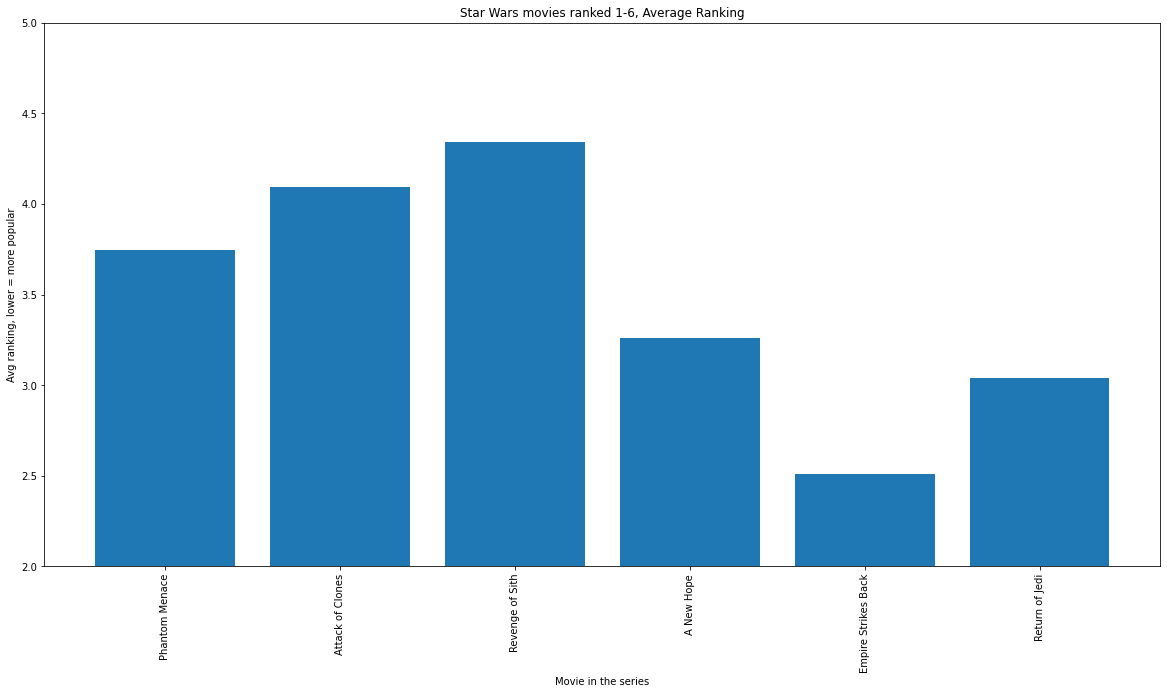

In [23]:
# checking the average ranking of each movie
labels = [
    "Phantom Menace",
    "Attack of Clones",
    "Revenge of Sith",
    "A New Hope",
    "Empire Strikes Back",
    "Return of Jedi",
]
x_label_pos = [0, 1, 2, 3, 4, 5]
plt.figure(figsize=(20, 10))
plt.bar(range(6), data[data.columns[9:15]].mean())
plt.title("Star Wars movies ranked 1-6, Average Ranking")
plt.ylim(2, 5)
plt.ylabel("Avg ranking, lower = more popular")
plt.xlabel("Movie in the series")
plt.xticks(x_label_pos, labels, rotation="vertical")
plt.show()

In [24]:
data[data.columns[3:9]].sum()

seen_1    659
seen_2    560
seen_3    539
seen_4    597
seen_5    745
seen_6    725
dtype: int64

<a id="question2"></a><h2>Which movie has been seen the most?</h2>

<p><strong>Response :</strong> We can see above that Empire and Jedi are the two movies which have been seen the most. Which supports the fact that they were also the two most popular films. Surprisingly, A new hope was not 3rd, but 4th, by about 15-20% less viewings than phantom menace. Despite the fact that in popularity A new hope was almost as popular as return of the jedi.</p>

<p><a href="#top">[Return to top]</a></p>

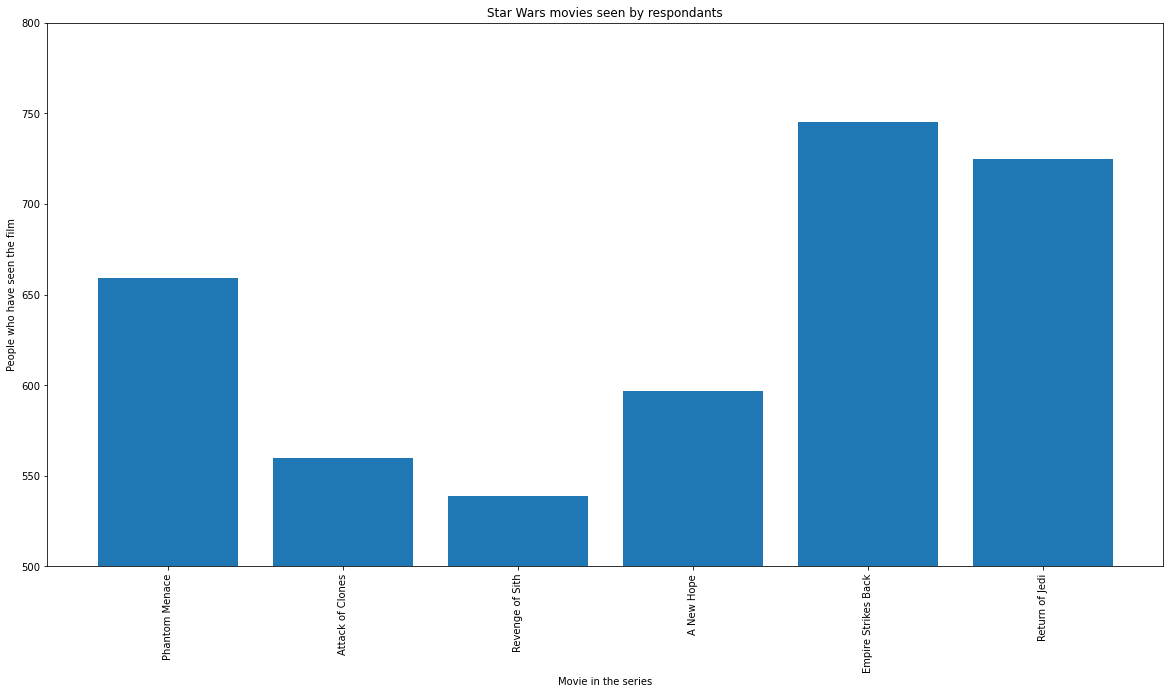

In [25]:
# checking which movie has been seen the most
labels = [
    "Phantom Menace",
    "Attack of Clones",
    "Revenge of Sith",
    "A New Hope",
    "Empire Strikes Back",
    "Return of Jedi",
]
x_label_pos = [0, 1, 2, 3, 4, 5]
plt.figure(figsize=(20, 10))
plt.bar(range(6), data[data.columns[3:9]].sum())
plt.title("Star Wars movies seen by respondants")
plt.ylim(500, 800)
plt.ylabel("People who have seen the film")
plt.xlabel("Movie in the series")
plt.xticks(x_label_pos, labels, rotation="vertical")
plt.show()

In [26]:
# splitting up the dataset into male/female respondants
data_male = data[data["Gender"] == "Male"]
data_female = data[data["Gender"] == "Female"]

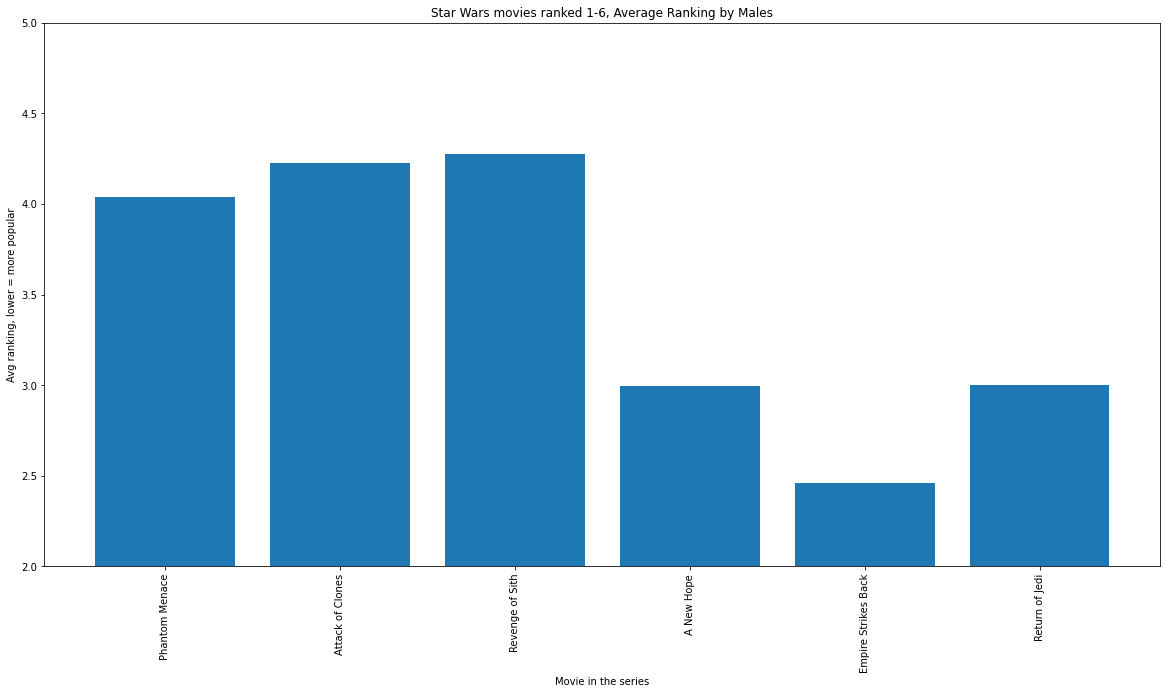

In [27]:
# checking the average male ranking of each movie
labels = [
    "Phantom Menace",
    "Attack of Clones",
    "Revenge of Sith",
    "A New Hope",
    "Empire Strikes Back",
    "Return of Jedi",
]
x_label_pos = [0, 1, 2, 3, 4, 5]
plt.figure(figsize=(20, 10))
plt.bar(range(6), data_male[data_male.columns[9:15]].mean())
plt.title("Star Wars movies ranked 1-6, Average Ranking by Males")
plt.ylim(2, 5)
plt.ylabel("Avg ranking, lower = more popular")
plt.xlabel("Movie in the series")
plt.xticks(x_label_pos, labels, rotation="vertical")
plt.show()

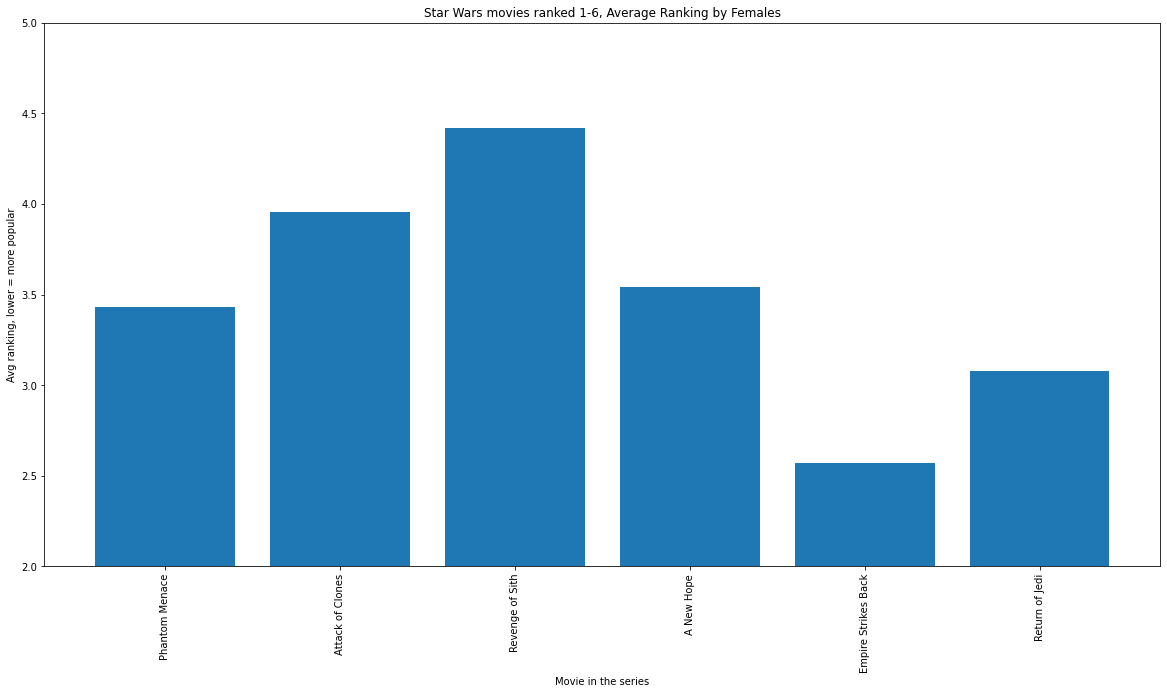

In [28]:
# checking the average female ranking of each movie
labels = [
    "Phantom Menace",
    "Attack of Clones",
    "Revenge of Sith",
    "A New Hope",
    "Empire Strikes Back",
    "Return of Jedi",
]
x_label_pos = [0, 1, 2, 3, 4, 5]
plt.figure(figsize=(20, 10))
plt.bar(range(6), data_female[data_female.columns[9:15]].mean())
plt.title("Star Wars movies ranked 1-6, Average Ranking by Females")
plt.ylim(2, 5)
plt.ylabel("Avg ranking, lower = more popular")
plt.xlabel("Movie in the series")
plt.xticks(x_label_pos, labels, rotation="vertical")
plt.show()

In [29]:
# getting all our gender data into a mixed pivot table to better visualize it side by side.
data_gendered = data[
    [
        "ranking_1",
        "ranking_2",
        "ranking_3",
        "ranking_4",
        "ranking_5",
        "ranking_6",
        "Gender",
    ]
]
data_gendered_pivot = data_gendered.pivot_table(
    ["ranking_1", "ranking_2", "ranking_3", "ranking_4", "ranking_5", "ranking_6"],
    "Gender",
    aggfunc=np.mean,
)

NumExpr defaulting to 8 threads.


<a id="question3"></a><h2>Is there any difference between movie rankings and gender?</h2>

<p><strong>Response :</strong> Overall the two charts follow the same format. Both women and men generally rated the original trilogy better than the prequels with Empire being the most popular (note: women ranked phantom and a new hope almost equally)

Where we see some differences is that the women are clearly ranked more consistently the prequels in descending order of quality whereas for the men the prequels are more equally rated (values are closer together).

Curiously, men ranked return and a new hope almost equally, while women clearly favored return of the jedi, placing a new hope even with phantom. Is this the Ewok effect? Did adding cute furry bears impact this choice '\o/'?</p>

<p><a href="#top">[Return to top]</a></p>

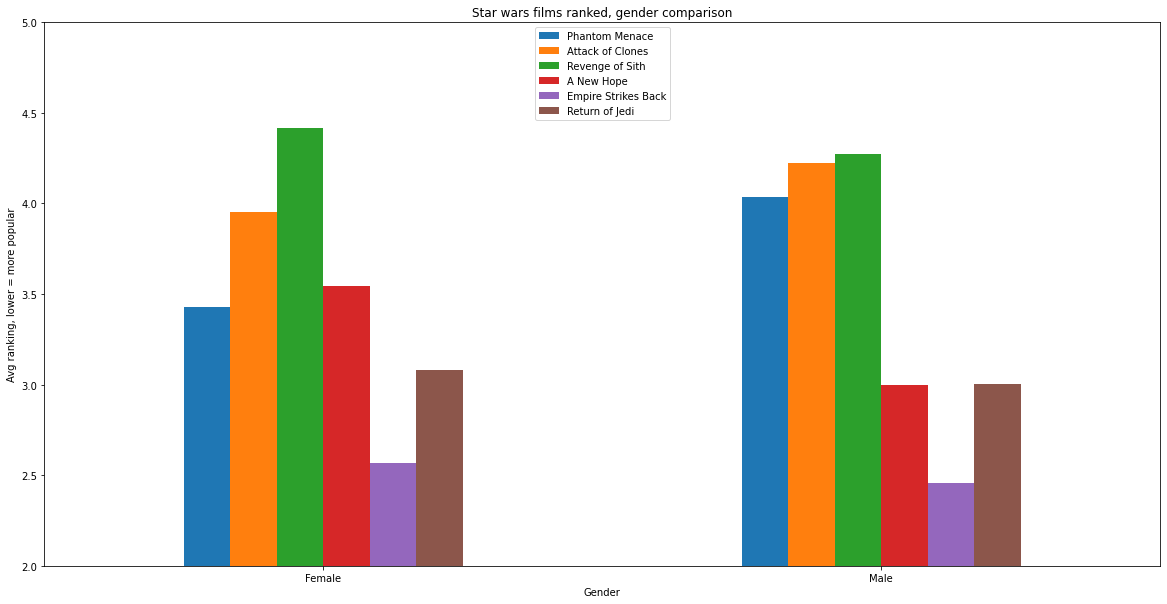

In [30]:
mylabels = [
    "Phantom Menace",
    "Attack of Clones",
    "Revenge of Sith",
    "A New Hope",
    "Empire Strikes Back",
    "Return of Jedi",
]
data_gendered_pivot.plot(
    kind="bar",
    ylim=(2, 5),
    title="Star wars films ranked, gender comparison",
    legend=True,
    figsize=(20, 10),
)
plt.legend(labels=mylabels, loc=9)
plt.ylabel("Avg ranking, lower = more popular")
plt.xticks(rotation=0)
plt.show()

In [31]:
# trying now to answer the question, which character is most popular? We will rename the columns to reflect this
data = data.rename(
    columns={
        "Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.": "Han_Solo",
        "Unnamed: 16": "Luke_Skywalker",
        "Unnamed: 17": "Princess_Leia",
        "Unnamed: 18": "Anakin_Skywalker",
        "Unnamed: 19": "Obi_Wan_Kenobi",
        "Unnamed: 20": "Emperor_Palpatine",
        "Unnamed: 21": "Darth_Vader",
        "Unnamed: 22": "Lando",
        "Unnamed: 23": "Boba",
        "Unnamed: 24": "C3P0",
        "Unnamed: 25": "R2D2",
        "Unnamed: 26": "Jar_Jar",
        "Unnamed: 27": "Padme",
        "Unnamed: 28": "Yoda",
    }
)

In [32]:
# making a new dataframe of character popularity information
char_pop = pd.DataFrame()
char_list = [
    "Han_Solo",
    "Luke_Skywalker",
    "Princess_Leia",
    "Anakin_Skywalker",
    "Obi_Wan_Kenobi",
    "Emperor_Palpatine",
    "Darth_Vader",
    "Lando",
    "Boba",
    "C3P0",
    "R2D2",
    "Jar_Jar",
    "Padme",
    "Yoda",
]
for char in char_list:
    char_pop[char] = data[char].value_counts()

# resetting the index and transposing the dataframe for making a stacked bar chart of the responses...
char_pop.reset_index()
char_pop_t = char_pop.transpose()
char_pop_t

,Very favorably,Somewhat favorably,Neither favorably nor unfavorably (neutral),Unfamiliar (N/A),Somewhat unfavorably,Very unfavorably
Han_Solo,600,147,43,15,7,1
Luke_Skywalker,545,212,37,6,12,3
Princess_Leia,538,205,47,8,11,6
Anakin_Skywalker,238,264,133,52,81,39
Obi_Wan_Kenobi,582,155,41,17,7,7
Emperor_Palpatine,108,137,209,154,67,123
Darth_Vader,305,169,81,9,98,148
Lando,138,220,229,147,62,8
Boba,134,150,242,131,95,45
C3P0,465,224,78,15,22,7


<a id="question4"></a><h2>Which characters are most or least popular?</h2>

<p><strong>Response :</strong> We find some interesting results in the most/least popular categories as well as the most unkown.

Most popular are dominated by the heros (han, luke, obi wan). There are some surprising inclusions such as a droid, R2D2, and Yoda.

Least popular are Jar jar, But also surprisngly Darth Vader, who appears well ranked on both lists. Vader is clearly the most confusing or the most difficult of the characters for the people to rate as he pretty equally liked across all knowing answers.

Very surprisingly is the unknown list. Important central characters of Padme (prequels) and Palpatine (prequels+original trilogy) are the least known of all the characters listed. Ahead of support characters, Lando and Boba.</p>

<p><a href="#top">[Return to top]</a></p>

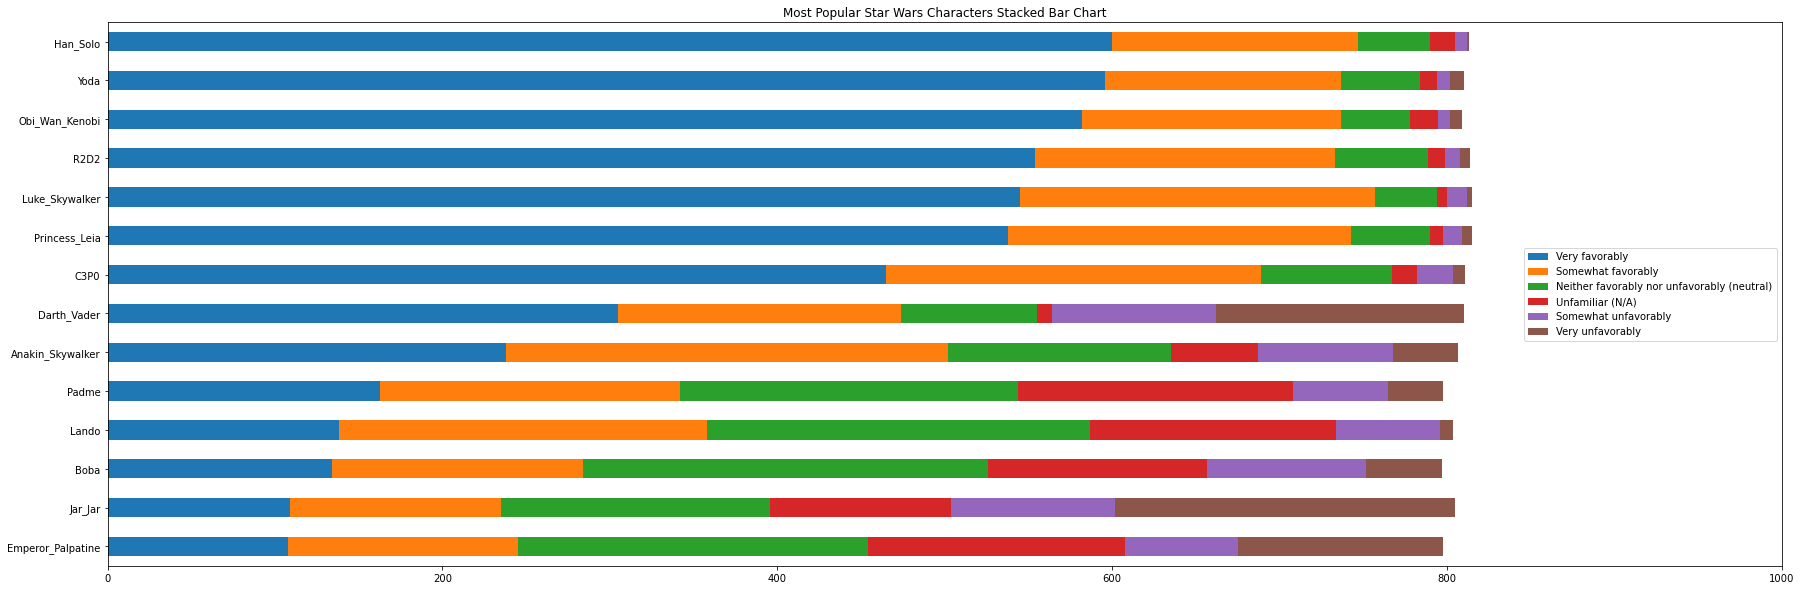

In [33]:
# Viewing the most popular characters sorted by the two positive responses options
char_pop_t.sort_values(["Very favorably", "Somewhat favorably"]).plot(
    kind="barh",
    stacked=True,
    title="Most Popular Star Wars Characters Stacked Bar Chart",
    xlim=(0, 1000),
    figsize=(30, 10),
)
plt.legend(loc=7)
plt.show()

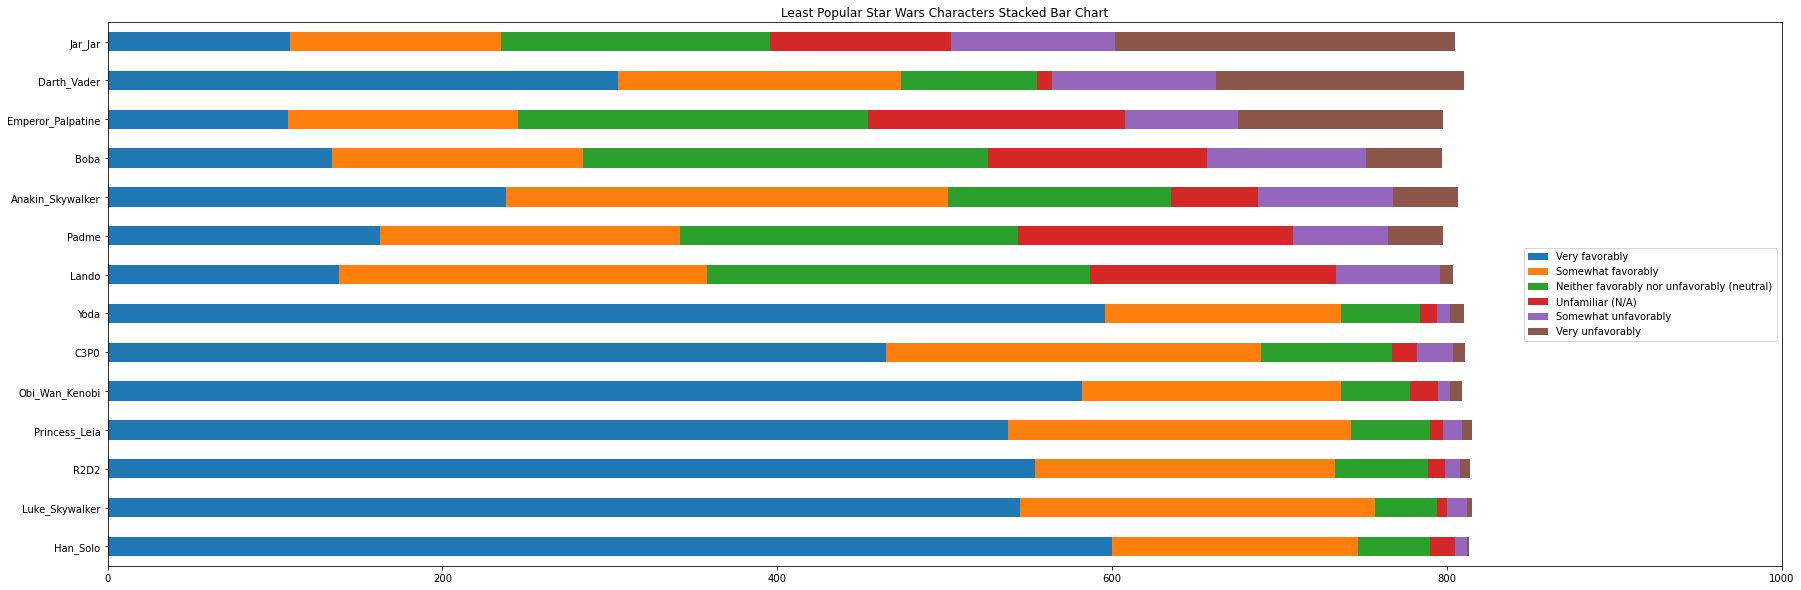

In [34]:
# Viewing the least popular characters sorted by the two positive responses options
char_pop_t.sort_values(["Very unfavorably", "Somewhat unfavorably"]).plot(
    kind="barh",
    stacked=True,
    title="Least Popular Star Wars Characters Stacked Bar Chart",
    xlim=(0, 1000),
    figsize=(30, 10),
)
plt.legend(loc=7)
plt.show()

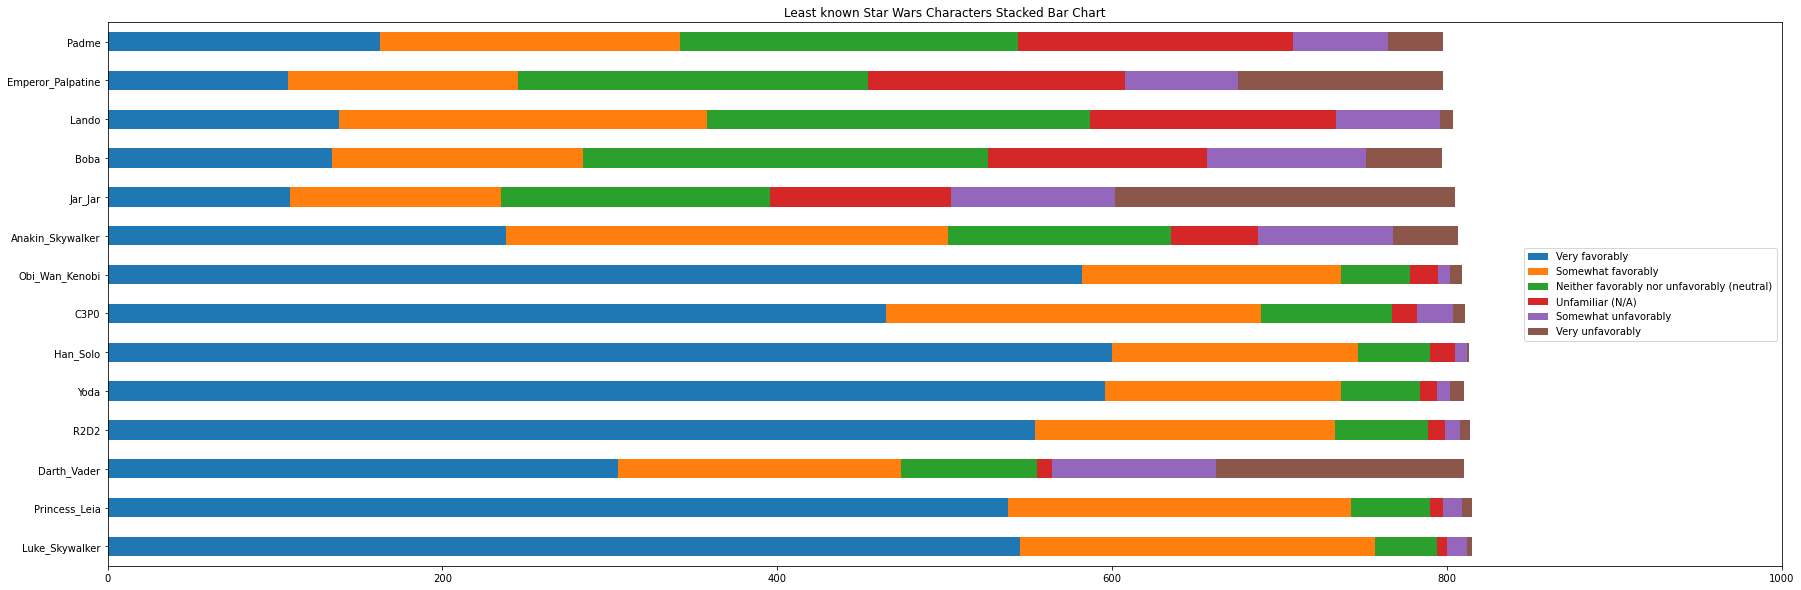

In [35]:
# Viewing the least known characters, this could be interesting as a sign of who people are familiar with to start from.
char_pop_t.sort_values("Unfamiliar (N/A)").plot(
    kind="barh",
    stacked=True,
    title="Least known Star Wars Characters Stacked Bar Chart",
    xlim=(0, 1000),
    figsize=(30, 10),
)
plt.legend(loc=7)
plt.show()

<a id="question5"></a><h2>Do our answers change among hardcore fans?</h2>

<p><strong>Response :</strong> To answer this question we have the column of "Do you consider yourself a fan of the star wars universe?" And while at face value this may seem like a valid question to use as a base for building a list of hardcore fans, it's very direct. Instead the question of "Who shot first?" is perhaps a better judge of a hardcore fan. Either you know what the question refers to or not.. Regardless of who you may choose. Either get the reference... or you don't... We're gonna use this as a base for our hardcore fans popular/unpopular segmented analysis.</p>

<p><a href="#top">[Return to top]</a></p>

In [36]:
# Out of curiosity, how many people responded here.
data["Do you consider yourself to be a fan of the Expanded Universe?æ"].value_counts()

No     114
Yes     98
Name: Do you consider yourself to be a fan of the Expanded Universe?æ, dtype: int64

In [37]:
# Seeing how many people responded han, greedo, etc
data["Which character shot first?"].value_counts(dropna=False)

Han                                 322
I don't understand this question    305
NaN                                 226
Greedo                              193
Name: Which character shot first?, dtype: int64

In [38]:
# we're gonna assume that if you didn't answer it's because you didn't understand. So taking only those who responded.. Which kudos to the hardcore fans for knowing that Han shot first!
hardcore = data.copy()[
    (data["Which character shot first?"] == "Han")
    | (data["Which character shot first?"] == "Greedo")
]

In [39]:
hardcore.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 515 entries, 5 to 1185
Data columns (total 38 columns):
 #   Column                                                                 Non-Null Count  Dtype  
---  ------                                                                 --------------  -----  
 0   RespondentID                                                           515 non-null    float64
 1   Have you seen any of the 6 films in the Star Wars franchise?           515 non-null    object 
 2   Do you consider yourself to be a fan of the Star Wars film franchise?  515 non-null    object 
 3   seen_1                                                                 515 non-null    bool   
 4   seen_2                                                                 515 non-null    bool   
 5   seen_3                                                                 515 non-null    bool   
 6   seen_4                                                                 515 non-null    bo

In [40]:
# Which film is most popular (split by genders) among hardcore fans ... getting all our gender data into a mixed pivot table to better visualize it side by side.
hardcore_gendered = hardcore[
    [
        "ranking_1",
        "ranking_2",
        "ranking_3",
        "ranking_4",
        "ranking_5",
        "ranking_6",
        "Gender",
    ]
]
hardcore_gendered_pivot = hardcore_gendered.pivot_table(
    ["ranking_1", "ranking_2", "ranking_3", "ranking_4", "ranking_5", "ranking_6"],
    "Gender",
    aggfunc=np.mean,
)

<a id="question6"></a><h2>Which film is most popular among hardcore fans, split by gender?</h2>

<p><strong>Response :</strong> We find similar results to the previous gendered split with one notable exception. Hardcore male fans ranked the prequels in order of their release order (this was the opposite when we included all respondants). And a result which is quite different from the women still who went the opposite direction.</p>

<p><a href="#top">[Return to top]</a></p>

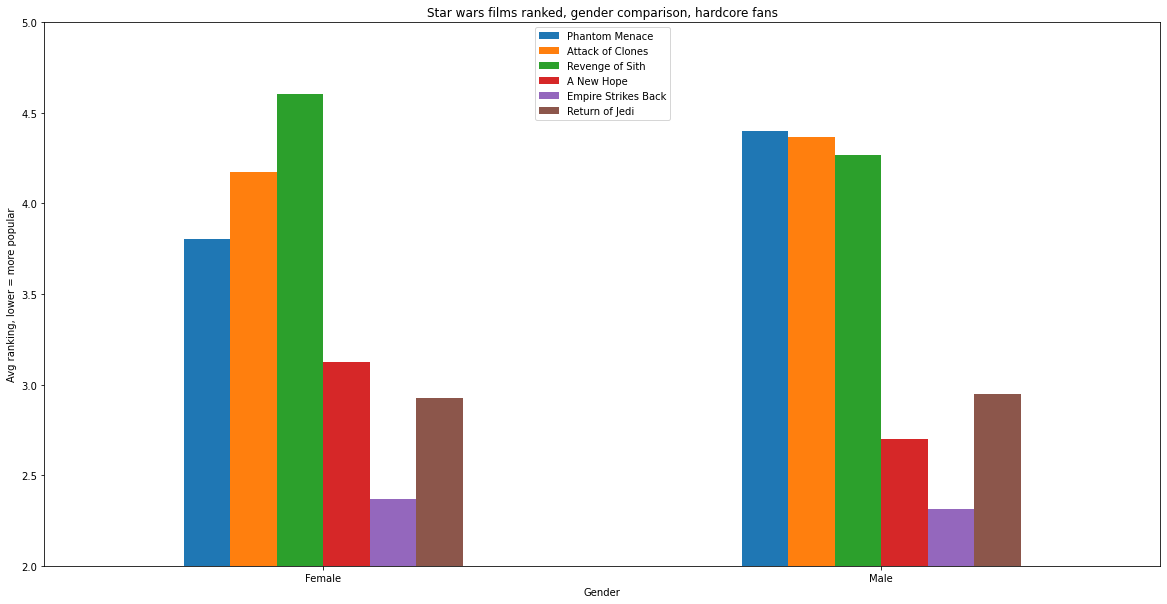

In [41]:
mylabels = [
    "Phantom Menace",
    "Attack of Clones",
    "Revenge of Sith",
    "A New Hope",
    "Empire Strikes Back",
    "Return of Jedi",
]
hardcore_gendered_pivot.plot(
    kind="bar",
    ylim=(2, 5),
    title="Star wars films ranked, gender comparison, hardcore fans",
    legend=True,
    figsize=(20, 10),
)
plt.legend(labels=mylabels, loc=9)
plt.ylabel("Avg ranking, lower = more popular")
plt.xticks(rotation=0)
plt.show()

In [42]:
# making a new dataframe of character popularity information
char_pop_hardcore = pd.DataFrame()
char_list_hardcore = [
    "Han_Solo",
    "Luke_Skywalker",
    "Princess_Leia",
    "Anakin_Skywalker",
    "Obi_Wan_Kenobi",
    "Emperor_Palpatine",
    "Darth_Vader",
    "Lando",
    "Boba",
    "C3P0",
    "R2D2",
    "Jar_Jar",
    "Padme",
    "Yoda",
]
for char in char_list_hardcore:
    char_pop_hardcore[char] = hardcore[char].value_counts()

# resetting the index and transposing the dataframe for making a stacked bar chart of the responses...
char_pop_hardcore.reset_index()
char_pop_hardcore_t = char_pop_hardcore.transpose()
char_pop_hardcore_t

,Very favorably,Somewhat favorably,Neither favorably nor unfavorably (neutral),Somewhat unfavorably
Han_Solo,413,79,15,5
Luke_Skywalker,359,125,18,10
Princess_Leia,356,121,24,9
Anakin_Skywalker,150,178,77,62
Obi_Wan_Kenobi,393,89,15,6
Emperor_Palpatine,89,103,126,47
Darth_Vader,217,112,44,55
Lando,109,170,147,41
Boba,113,116,141,69
C3P0,300,148,42,15


<a id="question7"></a><h2>Which characters are most/least popular among hardcore fans?</h2>

<p><strong>Response :</strong> We find some minor changes among hardcore fans, but largely the same results are there. A key thing is that no hardcore fan marked ANY character as a "strongly unfavorably". Which makes sense.. If you're a hardcore fan, you should like (at least partly) all characters... including jar jar binks....

This idea of being a hardcore fan or not remains an interesting segment that we're gonna continue to work with....</p>

<p><a href="#top">[Return to top]</a></p>

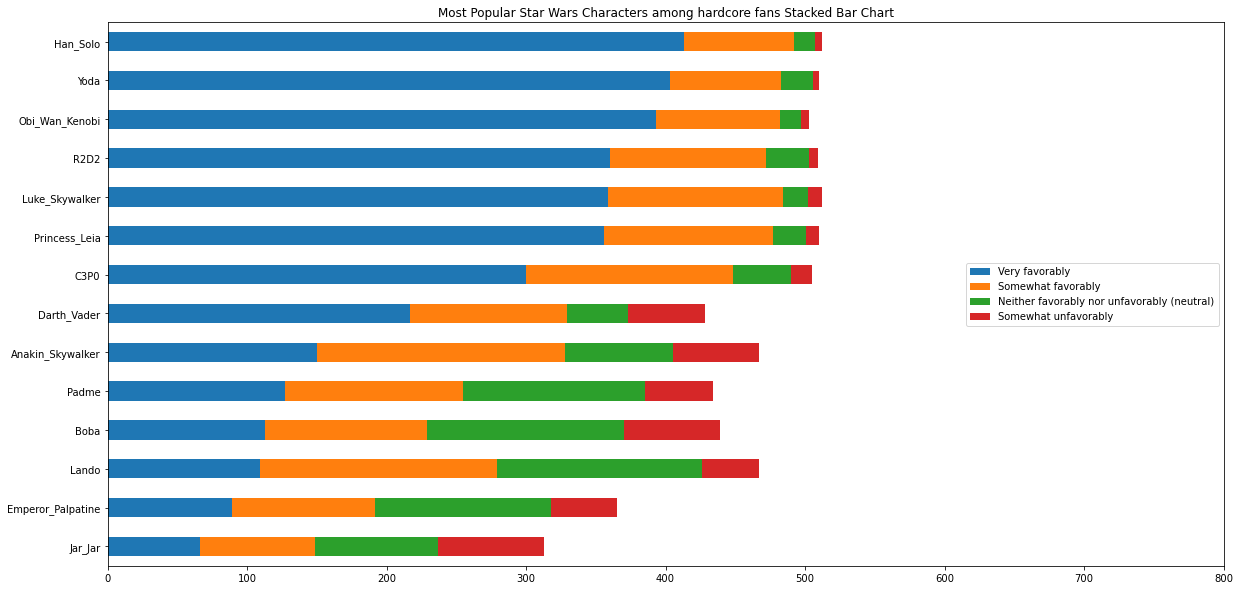

In [43]:
# Viewing the most popular characters among hardcore fans sorted by the two positive responses options
char_pop_hardcore_t.sort_values(["Very favorably", "Somewhat favorably"]).plot(
    kind="barh",
    stacked=True,
    title="Most Popular Star Wars Characters among hardcore fans Stacked Bar Chart",
    xlim=(0, 800),
    figsize=(20, 10),
)
plt.legend(loc=7)
plt.show()

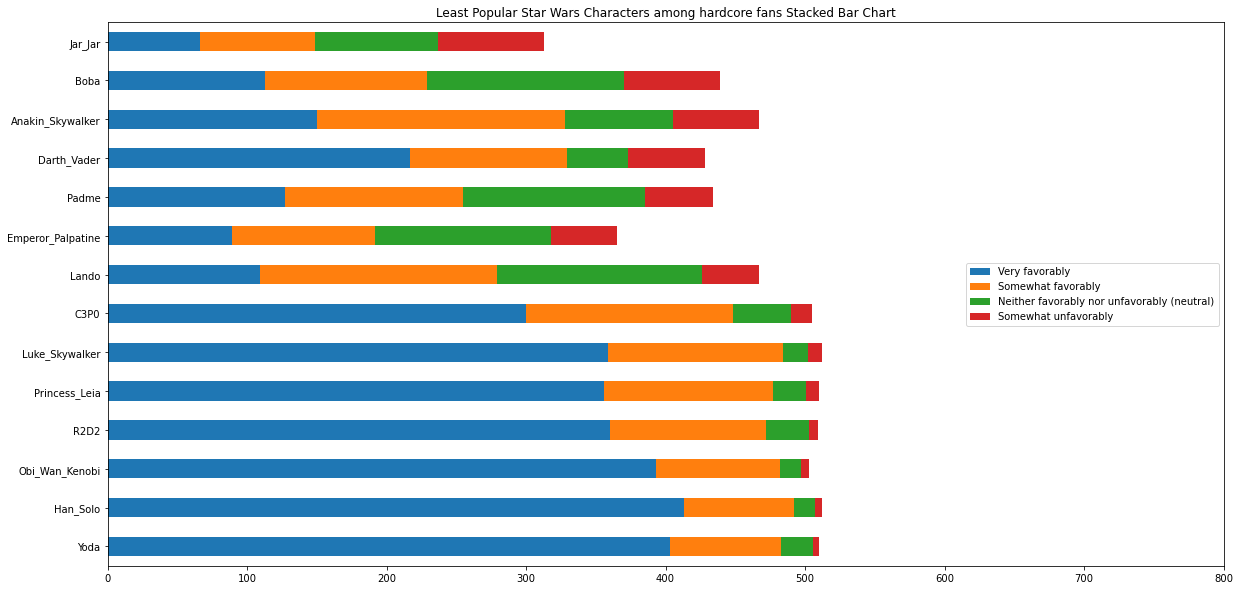

In [44]:
# Viewing the least popular characters among hardcore fans sorted by the two negative responses options
char_pop_hardcore_t.sort_values("Somewhat unfavorably").plot(
    kind="barh",
    stacked=True,
    title="Least Popular Star Wars Characters among hardcore fans Stacked Bar Chart",
    xlim=(0, 800),
    figsize=(20, 10),
)
plt.legend(loc=7)
plt.show()

In [45]:
# adding a new column to our original dataset that marks if the person is a hardcore fan or not with a boolean mask. Anyone who tried to respond is considered a hardcore fan, anyone who didn't or didn't understand the question isn't
hardcore = {
    "Han": True,
    "Greedo": True,
    "I don't understand this question": False,
    np.NaN: False,
}
data["hardcore"] = data["Which character shot first?"].map(hardcore)

In [46]:
# starting to take a look at the age data
data["Age"].value_counts()

45-60    291
> 60     269
30-44    268
18-29    218
Name: Age, dtype: int64

In [47]:
age_fav_films = data[
    [
        "Age",
        "ranking_1",
        "ranking_2",
        "ranking_3",
        "ranking_4",
        "ranking_5",
        "ranking_6",
    ]
]
age_fav_films_grouped = age_fav_films.groupby("Age").agg(np.mean).reset_index()
age_fav_films_grouped_t = age_fav_films_grouped.transpose()
headers = age_fav_films_grouped_t.iloc[0]
age_fav_films_grouped_t = pd.DataFrame(
    age_fav_films_grouped_t.values[1:], columns=headers
)
age_fav_films_grouped_t

Age,18-29,30-44,45-60,> 60
0,4.1,4.347826,3.541667,3.010417
1,4.1,4.309179,4.170833,3.761658
2,3.966667,4.475728,4.5375,4.316062
3,2.994444,2.932367,3.308333,3.80829
4,2.722222,2.21256,2.4375,2.73057
5,3.116667,2.714976,3.004167,3.357513


<a id="question8"></a><h2>In what order are the films most popular across different age groups? Are older fans nostalgic for the original trilogy?</h2>

<p><strong>Response :</strong> When viewed in the first graph we seem to see what appears in the other graphs. A preference for the later films. But when we compare side-by-side in the final graph, how each film was ranked among various age groups, we find stark differences and interesting insights.
<ul><li>For example, among 60 and older viewers, Phantom menace was actually well ranked.. among the top 3, better than Jedi for that age group.</li>
<li>Empire is universally loved by the 30-60 age groups, but equally lower ranked by both the young (less than 30) and older crowd (more than 60).</li>
<li>Very surprisingly... For the 60 and older crowd, A new hope is quite lowly ranked. Despite that these viewers would have been around 20 years old at the time of it's original theatrical release. An event which was universally heralded as being ground breaking at the time....</li></ul></p>

<p><a href="#top">[Return to top]</a></p>

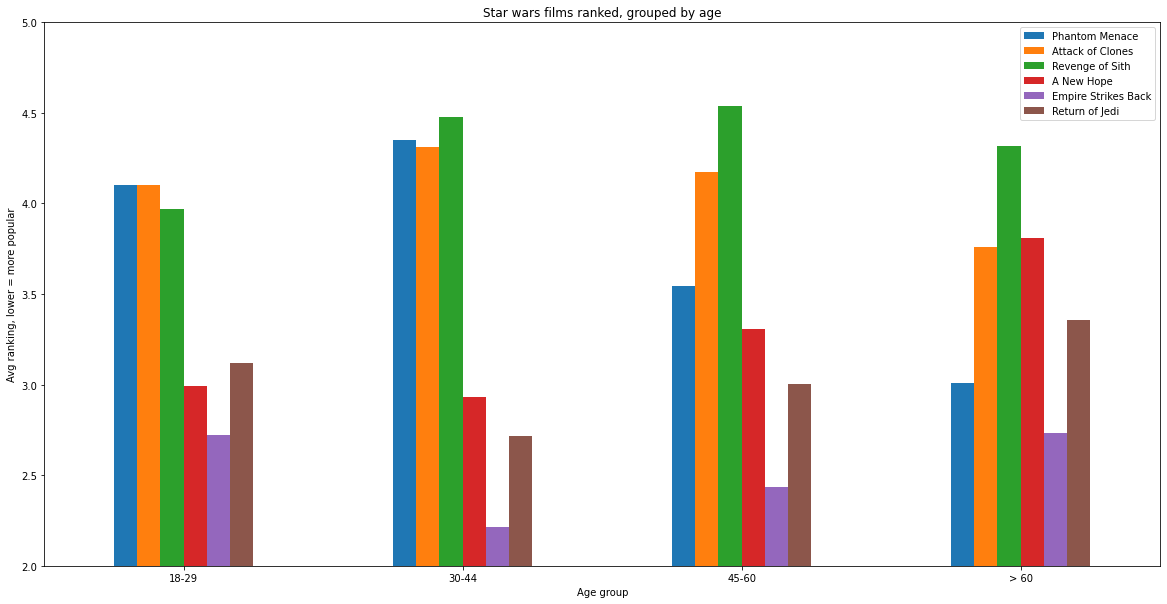

In [48]:
# checking the average ranking of each movie
labels = [
    "Phantom Menace",
    "Attack of Clones",
    "Revenge of Sith",
    "A New Hope",
    "Empire Strikes Back",
    "Return of Jedi",
]
x_label_pos = [0, 1, 2, 3]
age_fav_films_grouped.plot(
    kind="bar",
    ylim=(2, 5),
    title="Star wars films ranked, grouped by age",
    legend=True,
    figsize=(20, 10),
)
plt.legend(labels=labels)
plt.ylabel("Avg ranking, lower = more popular")
plt.xlabel("Age group")
plt.xticks(x_label_pos, age_fav_films_grouped["Age"], rotation="horizontal")
plt.show()

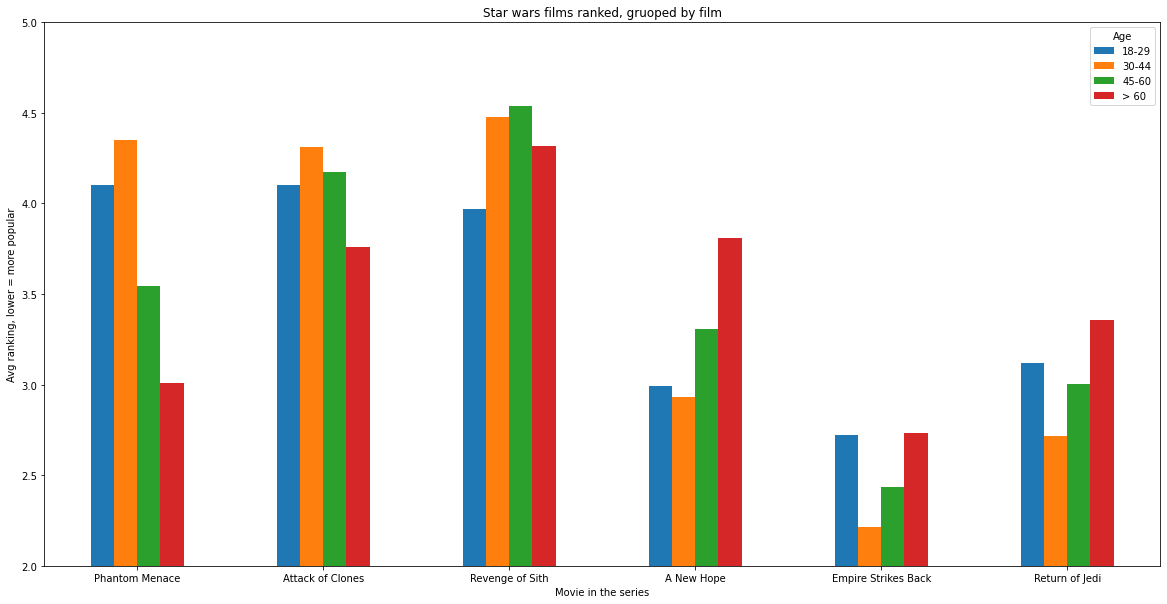

In [49]:
# checking the average ranking of each movie
labels = [
    "Phantom Menace",
    "Attack of Clones",
    "Revenge of Sith",
    "A New Hope",
    "Empire Strikes Back",
    "Return of Jedi",
]
x_label_pos = [0, 1, 2, 3, 4, 5]
age_fav_films_grouped_t.plot(
    kind="bar",
    ylim=(2, 5),
    title="Star wars films ranked, gruoped by film",
    legend=True,
    figsize=(20, 10),
)
plt.ylabel("Avg ranking, lower = more popular")
plt.xlabel("Movie in the series")
plt.xticks(x_label_pos, labels, rotation="horizontal")
plt.show()

In [50]:
data["Household Income"].value_counts()

$50,000 - $99,999      298
$25,000 - $49,999      186
$100,000 - $149,999    141
$0 - $24,999           138
$150,000+               95
Name: Household Income, dtype: int64

In [51]:
# Getting a simple data frame with income level and rankings
inc_fav_films = data[
    [
        "Household Income",
        "ranking_1",
        "ranking_2",
        "ranking_3",
        "ranking_4",
        "ranking_5",
        "ranking_6",
    ]
]

# The income column was a bit messy, cleaning it up some.
inc_fav_films["Household Income"] = (
    inc_fav_films["Household Income"]
    .str.replace("$", "")
    .str.replace(",", "")
    .str.replace(" ", "")
)

# grouping by household income
inc_fav_films_grouped = (
    inc_fav_films.groupby("Household Income").agg(np.mean).reset_index()
)

# reindexing to be in ascending order of income for easier viewing in the plot below
inc_fav_films_grouped = inc_fav_films_grouped.reindex([0, 3, 4, 1, 2])
inc_fav_films_grouped

<ipython-input-51-b0678a0ddf68>:16: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  inc_fav_films["Household Income"]
<ipython-input-51-b0678a0ddf68>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inc_fav_films["Household Income"] = (


,Household Income,ranking_1,ranking_2,ranking_3,ranking_4,ranking_5,ranking_6
0,0-24999,3.816327,3.959184,4.102041,3.173469,2.744898,3.204082
3,25000-49999,3.469388,3.870748,4.251701,3.646259,2.482993,3.278912
4,50000-99999,3.827004,4.176471,4.340336,3.088235,2.445378,3.113445
1,100000-149999,3.756522,4.173913,4.403509,3.400000,2.400000,2.852174
2,150000+,3.740260,4.376623,4.571429,2.961039,2.324675,3.025974


<a id="question9"></a><h2>Does income bracket change your rankings?</h2>

<p><strong>Response :</strong> We do see changing trends depending on the person's income bracket. Those who have a higher income bracket consistently ranked Empire better and better and the prequels worse and worse. There is a slight inverse relationship between them. Critically the original trilogy and specifically Empire are considered to be the most mature films/stories of the series. As often income bracket is a sign of education level, this could explain a deeper appreciation for the original trilogy as your income bracket increases.</p>

<p><a href="#top">[Return to top]</a></p>

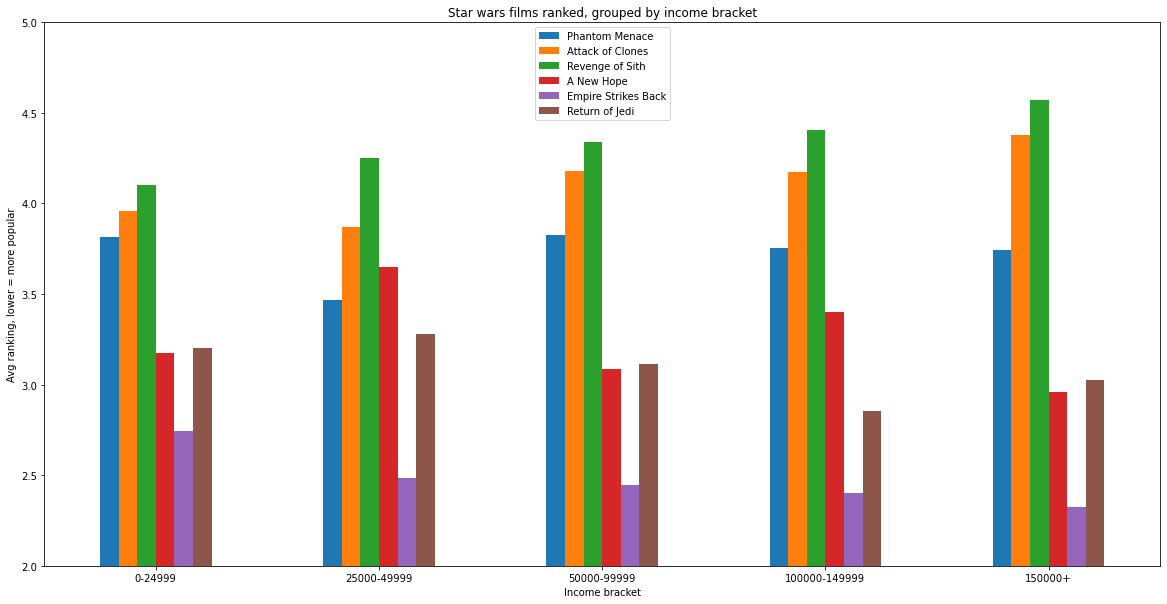

In [52]:
# checking the average ranking of each movie
labels = [
    "Phantom Menace",
    "Attack of Clones",
    "Revenge of Sith",
    "A New Hope",
    "Empire Strikes Back",
    "Return of Jedi",
]
x_label_pos = [0, 1, 2, 3, 4]
inc_fav_films_grouped.plot(
    kind="bar",
    ylim=(2, 5),
    title="Star wars films ranked, grouped by income bracket",
    legend=True,
    figsize=(20, 10),
)
plt.legend(labels=labels, loc=9)
plt.ylabel("Avg ranking, lower = more popular")
plt.xlabel("Income bracket")
plt.xticks(
    x_label_pos, inc_fav_films_grouped["Household Income"], rotation="horizontal"
)
plt.show()

In [54]:
# exporting data for viz in tableau
data.to_csv("star_wars_data.csv")
char_pop_t.to_csv("star_wars_characters_popularity.csv")